<h2 align=center>InfoViz MET Data with Seaborn and Python (Part 1)</h2>

### Libraries

In [1]:
import numpy as np
import pandas as pd
#pd.set_option('max_columns', None)
pd.options.display.width = 0
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shhaj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Task 1: Data Loading and Exploration

In [10]:
ita_data=pd.read_csv('italianData.csv')
ita_data.head(3)

,Unnamed: 0,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,0,1985.5,0,0,1,435573,NaN,European Paintings,1985.0,Painting,...,NaN,Paintings,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q19912099,NaN,"Metropolitan Museum of Art, New York, NY",Goddess|Putti|Flowers|Landscapes,http://vocab.getty.edu/page/aat/300343852|http...,https://www.wikidata.org/wiki/Q205985|https://...
1,1,12.6,0,0,1,435574,NaN,European Paintings,1912.0,"Painting, predella panel",...,NaN,Paintings,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q19905919,NaN,"Metropolitan Museum of Art, New York, NY",Soldiers|Men|Crucifixion|Horses|Mountains|Ange...,http://vocab.getty.edu/page/aat/300185678|http...,https://www.wikidata.org/wiki/Q4991371|https:/...
2,2,42.53.2,0,0,1,435575,NaN,European Paintings,1942.0,"Painting, miniature",...,NaN,Miniatures,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q19913805,NaN,"Metropolitan Museum of Art, New York, NY",Kings|Men|Portraits,http://vocab.getty.edu/page/aat/300025481|http...,https://www.wikidata.org/wiki/Q12097|https://w...


### Task 2: Visualizing the Target Distribution

C:\Users\shhaj\AppData\Local\Temp\ipykernel_10864\232986369.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

D:\PycharmProjects\datavenv_py3109\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



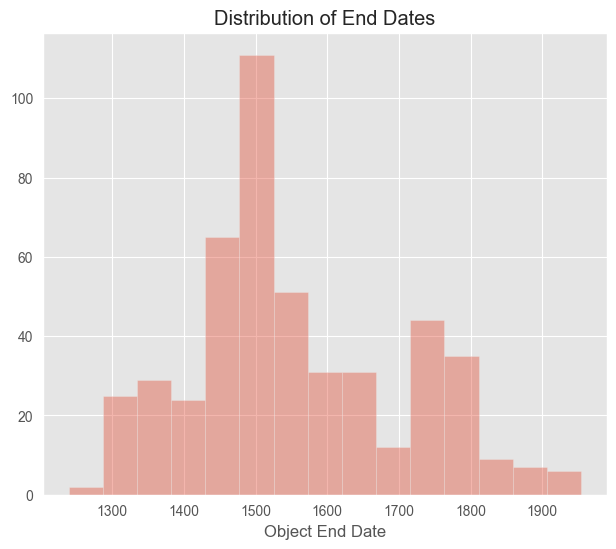

In [15]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(ita_data['Object End Date'], kde=False);
plt.title('Distribution of End Dates');
# plt.subplot(1, 2, 2)
# sns.distplot(np.log1p(ita_data['Object End Date']), kde = False)
# plt.title('Distribution of Log-transformed End Dates')

In [12]:
ita_data['log_enddate'] = np.log1p(ita_data['Object End Date'])

C:\Users\shhaj\AppData\Local\Temp\ipykernel_10864\3534971459.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

D:\PycharmProjects\datavenv_py3109\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



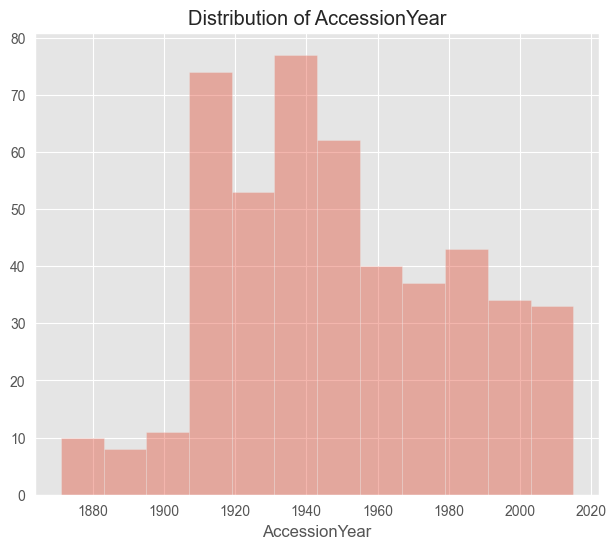

In [16]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(ita_data['AccessionYear'], kde=False);
plt.title('Distribution of AccessionYear');
# plt.subplot(1, 2, 2)
# sns.distplot(np.log1p(ita_data['AccessionYear']), kde = False)
# plt.title('Distribution of Log-transformed AccessionYear')

C:\Users\shhaj\AppData\Local\Temp\ipykernel_10864\4106465034.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

D:\PycharmProjects\datavenv_py3109\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



ValueError: could not convert string to float: 'Oil on canvas'

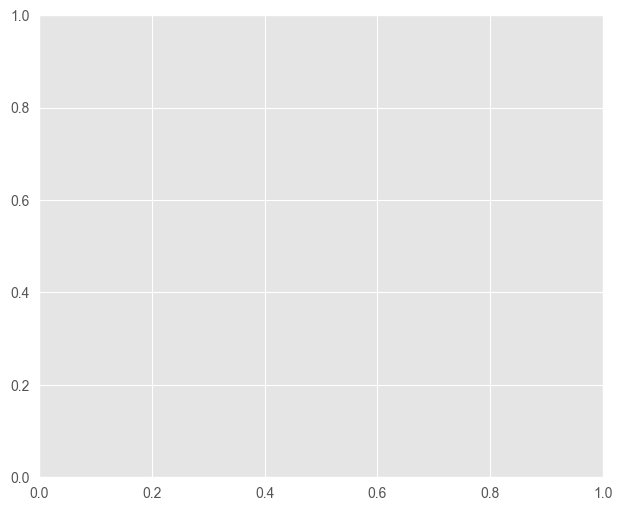

In [22]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(ita_data['Medium'], kde=False);
plt.title('Distribution of End Dates');
# plt.subplot(1, 2, 2)
# sns.distplot(np.log1p(ita_data['Medium']), kde = False)
# plt.title('Distribution of Log-transformed')

#####  DistPlot could not convert string, for example 'Oil on canvas', to float.
#####  Maybe we can create a numerical label list for the column 'Medium'

### Task 3: Relationship between Film Revenue and Budget

### Task 4: Does having an Official Homepage Affect Revenue?

### Task 5: Distribution of Mediums in Paintings

In [25]:
medium_data = ita_data.loc[ita_data['Medium'].isin(ita_data['Medium'].value_counts().head(10).index)]


Text(0.5, 1.0, 'Mean Medium of Paintings per Accession Year')

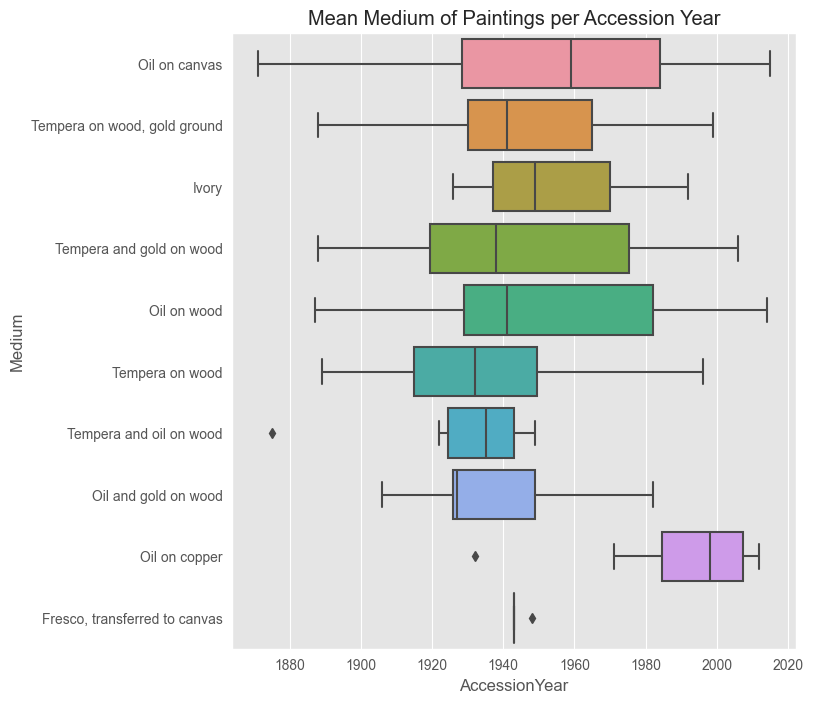

In [26]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='AccessionYear', y='Medium', data=medium_data)
plt.title('Mean Medium of Paintings per Accession Year')

### Task 6: Frequent Mediums and Titles in Paintings

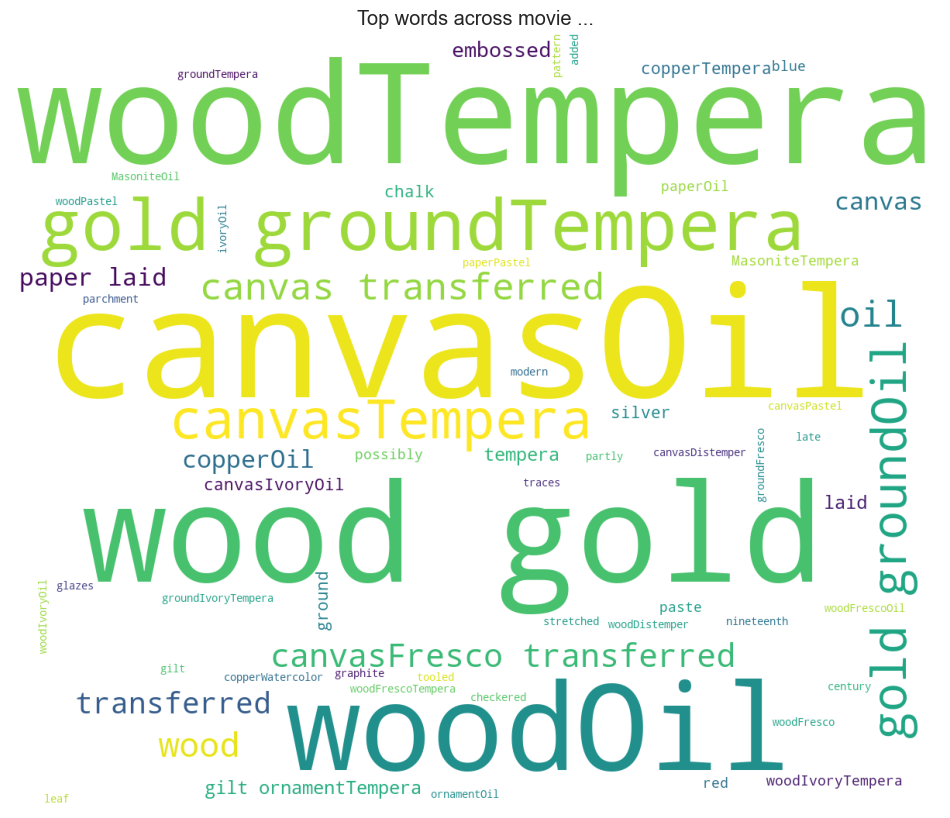

In [27]:
plt.figure(figsize=(12, 12))
text = ''.join(ita_data['Medium'].values)
wordcloud = WordCloud(max_font_size=None,
                       background_color='white',
                       width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words across movie ...')
plt.axis('off')
plt.show()

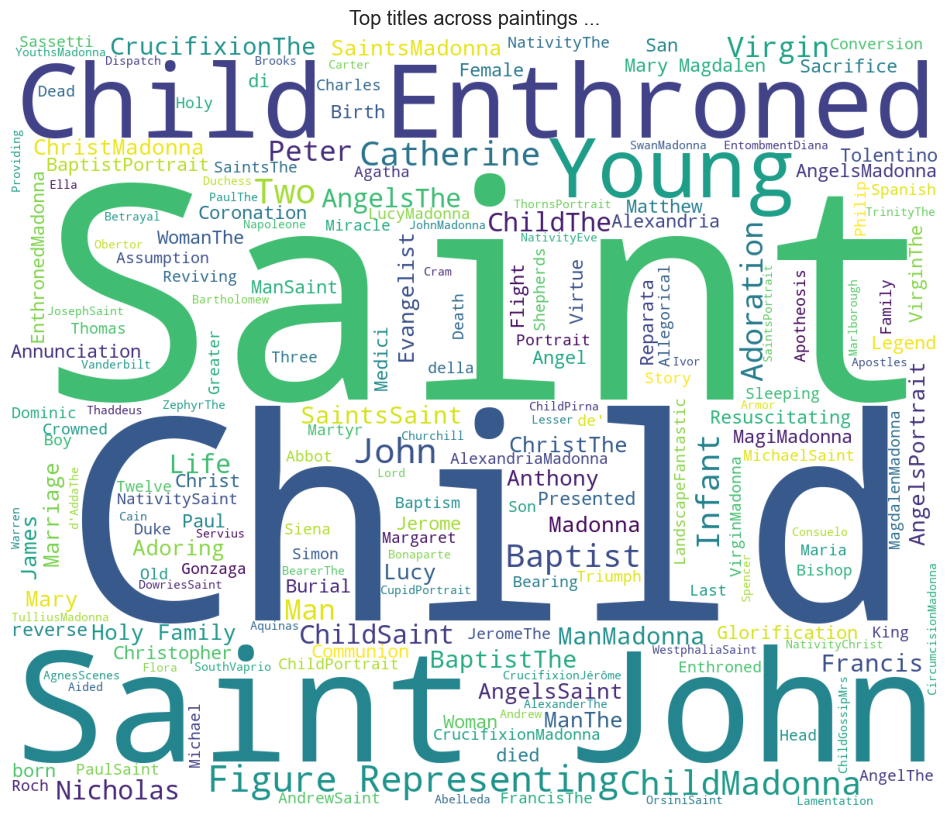

In [28]:
plt.figure(figsize=(12, 12))
text = ''.join(ita_data['Title'].values)
wordcloud = WordCloud(max_font_size=None,
                       background_color='white',
                       width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top titles across paintings ...')
plt.axis('off')
plt.show()

### Task 7: Co-relations?????